# balanced 802.11 specific attacks WIDS
## Random Forest Classifier
Main focus of attacks ( Deauth, Disas, Reassoc, Rogue AP, Krack, Kr00k)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Chosen features

In [2]:
features_to_keep = ['frame.len', 'radiotap.length', 'radiotap.present.tsft', 'radiotap.channel.freq',
                    'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 'radiotap.dbm_antsignal',
                    'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry',
                    'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.duration','Label']

### Deauthentication

In [3]:
deauth_path = 'D:/uni/Bachelor Thesis/datasets/awid/awid3/CSV/1.Deauth'

deauth_df = pd.DataFrame()

csv_files = [f for f in os.listdir(deauth_path) if f.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(deauth_path, csv_file)
    df = pd.read_csv(file_path, header=0)
    existing_columns = set(df.columns)
    columns_to_keep = list(set(features_to_keep) & existing_columns)
    df = df[columns_to_keep]
    deauth_df = pd.concat([deauth_df, df], ignore_index=True)


C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\482488578.py:9: DtypeWarning: Columns (20,21,23,24,43,44,45,48,50,51,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,122,132,137,138,139,141,143,145,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,184,185,189,190,192,193,194,196,197,203,204,205,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\482488578.py:9: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,183,184,185,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9

### Disassociation

In [4]:
disas_path = 'D:/uni/Bachelor Thesis/datasets/awid/awid3/CSV/2.Disas'

disas_df = pd.DataFrame()

csv_files = [f for f in os.listdir(disas_path) if f.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(disas_path, csv_file)
    df = pd.read_csv(file_path, header=0)
    existing_columns = set(df.columns)
    columns_to_keep = list(set(features_to_keep) & existing_columns)
    df = df[columns_to_keep]
    disas_df = pd.concat([disas_df, df], ignore_index=True)


C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\1853650719.py:9: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,119,120,122,132,137,138,139,141,142,143,145,146,148,149,151,153,155,157,158,159,160,161,162,163,164,166,168,183,184,185,189,190,192,194,195,197,200,201,202,203,204,205,206,209,210,211,212,215,217,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\1853650719.py:9: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,118,166,168,184,185,189,190,192,193,194,195,200,201,202,203,204,205,206,209,210,211,212,213,215,217,248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\1853650719.py:9: DtypeWarning: Columns (71,7

### Reassociation

In [5]:
reassoc_path = 'D:/uni/Bachelor Thesis/datasets/awid/awid3/CSV/3.(Re)Assoc'

reassoc_df = pd.DataFrame()

csv_files = [f for f in os.listdir(reassoc_path) if f.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(reassoc_path, csv_file)
    df = pd.read_csv(file_path, header=0)
    existing_columns = set(df.columns)
    columns_to_keep = list(set(features_to_keep) & existing_columns) 
    df = df[columns_to_keep]
    reassoc_df = pd.concat([reassoc_df, df], ignore_index=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\634956836.py:9: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,87,92,93,94,96,112,113,114,116,117,118,119,120,122,132,137,138,141,142,143,145,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\634956836.py:9: DtypeWarning: Columns (71,73,77,78,79,80,87,93,118,166,184,189,190,192,193,194,197,203,204,205,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\634956836.py:9: DtypeWarning: Columns (23,24,48,50,51,71,73,77,78,7

### Rogue AP

In [6]:
rogueAP_path = 'D:/uni/Bachelor Thesis/datasets/awid/awid3/CSV/4.Rogue_AP'

rogueAP_df = pd.DataFrame()

csv_files = [f for f in os.listdir(rogueAP_path) if f.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(rogueAP_path, csv_file)
    df = pd.read_csv(file_path, header=0) 
    existing_columns = set(df.columns)
    columns_to_keep = list(set(features_to_keep) & existing_columns)
    df = df[columns_to_keep]
    rogueAP_df = pd.concat([rogueAP_df, df], ignore_index=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\324047271.py:9: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,132,136,137,138,139,141,142,143,144,145,146,147,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,175,176,177,178,180,181,183,184,185,189,190,192,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,217,244,247,248,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\324047271.py:9: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,87,90,91,92,93,98,99,100,101,102,103,104,107,108,109,110,111,112,113,114,116,117,118,166,189,190,192,193,194,195,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,247,248,249,250,251) have mixed types. Specify dtype option on import or set low

### Krack

In [7]:
krack_path = 'D:/uni/Bachelor Thesis/datasets/awid/awid3/CSV/5.Krack'

krack_df = pd.DataFrame()

csv_files = [f for f in os.listdir(krack_path) if f.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(krack_path, csv_file)
    df = pd.read_csv(file_path, header=0)
    existing_columns = set(df.columns)
    columns_to_keep = list(set(features_to_keep) & existing_columns)
    df = df[columns_to_keep]
    krack_df = pd.concat([krack_df, df], ignore_index=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\2919424143.py:9: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,105,107,108,109,110,111,112,113,114,116,117,118,120,121,122,132,136,137,138,141,143,145,146,148,149,150,151,153,155,157,158,159,160,161,162,163,164,166,167,168,169,170,171,172,173,174,175,176,177,178,180,181,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,208,209,210,211,212,213,217,244,247,249,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\2919424143.py:9: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,105,107,108,109,110,111,115,120,137,146,148,149,151,167,168,178,180,183,184,185,189,194,197,209,210,211,212,217,244,247,250,251,252) have mixed types. Specify dtype option on import or set low_memory=False.
  df = p

### Kr00k

In [8]:
kr00k_path = 'D:/uni/Bachelor Thesis/datasets/awid/awid3/CSV/6.Kr00k'

kr00k_df = pd.DataFrame()

csv_files = [f for f in os.listdir(kr00k_path) if f.endswith('.csv')]

for csv_file in csv_files:
    file_path = os.path.join(kr00k_path, csv_file)
    df = pd.read_csv(file_path, header=0)
    existing_columns = set(df.columns)
    columns_to_keep = list(set(features_to_keep) & existing_columns)
    df = df[columns_to_keep]
    kr00k_df = pd.concat([kr00k_df, df], ignore_index=True)

C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\1508962934.py:9: DtypeWarning: Columns (20,21,43,44,45,62,65,71,73,77,78,79,80,82,84,85,86,90,91,92,98,99,100,101,102,103,104,107,108,109,110,111,118,120,122,132,137,141,146,147,148,149,151,153,155,157,158,159,160,161,162,163,164,166,167,168,178,180,183,184,185,189,190,192,193,194,195,196,197,200,201,202,203,204,205,206,209,210,211,212,213,215,217,218,219,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\1508962934.py:9: DtypeWarning: Columns (82,84,85,87,90,91,92,93,94,96,98,99,100,101,102,103,104,107,108,109,110,111,118,166,189,192,194,196,197,217,218,219,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0)
C:\Users\marwa\AppData\Local\Temp\ipykernel_9156\1508962934.py:9: DtypeWarning: Columns (71,73,77,78,79,80,82,84,85,86,87,90,91,92,93,98,99,100,10

### Combined Data Frame

In [9]:
dfs_to_concat = [deauth_df, disas_df, reassoc_df, rogueAP_df, krack_df, kr00k_df]
combined_df = pd.concat(dfs_to_concat, ignore_index=True)

In [10]:
combined_df

,radiotap.length,radiotap.channel.flags.cck,wlan.fc.frag,Label,wlan.fc.pwrmgt,wlan.fc.moredata,radiotap.channel.freq,wlan.fc.type,wlan.fc.retry,radiotap.present.tsft,wlan.fc.subtype,radiotap.channel.flags.ofdm,wlan.fc.ds,wlan.fc.protected,frame.len,radiotap.dbm_antsignal,wlan.duration
0,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1-0-0,8.0,1.0,0x00000000,0.0,342.0,-34-37-34,0.0
1,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1-0-0,8.0,1.0,0x00000000,0.0,342.0,-34-38-34,0.0
2,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,1-0-0,0.0,1.0,0x00000002,1.0,136.0,-34-39-34,0.0
3,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,1-0-0,0.0,1.0,0x00000002,1.0,154.0,-34-39-34,0.0
4,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1-0-0,8.0,1.0,0x00000000,0.0,342.0,-35-40-35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796231,64.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,0-0-0,8.0,1.0,0x00000002,1.0,1550.0,-111,48.0
11796232,64.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,0-0-0,8.0,1.0,0x00000002,1.0,1550.0,-111,48.0
11796233,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,1.0,0.0,1-0-0,9.0,1.0,0x00000000,0.0,88.0,-196,0.0
11796234,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,1.0,0.0,1-0-0,11.0,1.0,0x00000000,0.0,76.0,-180,163.0


### dataset analysis

In [11]:
#datatypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11796236 entries, 0 to 11796235
Data columns (total 17 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   radiotap.length              float64
 1   radiotap.channel.flags.cck   float64
 2   wlan.fc.frag                 float64
 3   Label                        object 
 4   wlan.fc.pwrmgt               float64
 5   wlan.fc.moredata             float64
 6   radiotap.channel.freq        float64
 7   wlan.fc.type                 float64
 8   wlan.fc.retry                float64
 9   radiotap.present.tsft        object 
 10  wlan.fc.subtype              float64
 11  radiotap.channel.flags.ofdm  float64
 12  wlan.fc.ds                   object 
 13  wlan.fc.protected            float64
 14  frame.len                    float64
 15  radiotap.dbm_antsignal       object 
 16  wlan.duration                float64
dtypes: float64(13), object(4)
memory usage: 1.5+ GB


In [12]:
#check for nulls
combined_df.isnull().sum()

radiotap.length                 3
radiotap.channel.flags.cck      3
wlan.fc.frag                    3
Label                           6
wlan.fc.pwrmgt                  3
wlan.fc.moredata                3
radiotap.channel.freq           3
wlan.fc.type                    3
wlan.fc.retry                   3
radiotap.present.tsft           3
wlan.fc.subtype                 3
radiotap.channel.flags.ofdm     3
wlan.fc.ds                      3
wlan.fc.protected               3
frame.len                       3
radiotap.dbm_antsignal          3
wlan.duration                  60
dtype: int64

### Preprocessing

In [13]:
#remove NaNs
combined_df.dropna(inplace=True)

In [14]:
combined_df

,radiotap.length,radiotap.channel.flags.cck,wlan.fc.frag,Label,wlan.fc.pwrmgt,wlan.fc.moredata,radiotap.channel.freq,wlan.fc.type,wlan.fc.retry,radiotap.present.tsft,wlan.fc.subtype,radiotap.channel.flags.ofdm,wlan.fc.ds,wlan.fc.protected,frame.len,radiotap.dbm_antsignal,wlan.duration
0,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1-0-0,8.0,1.0,0x00000000,0.0,342.0,-34-37-34,0.0
1,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1-0-0,8.0,1.0,0x00000000,0.0,342.0,-34-38-34,0.0
2,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,1-0-0,0.0,1.0,0x00000002,1.0,136.0,-34-39-34,0.0
3,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,1-0-0,0.0,1.0,0x00000002,1.0,154.0,-34-39-34,0.0
4,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1-0-0,8.0,1.0,0x00000000,0.0,342.0,-35-40-35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796231,64.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,0-0-0,8.0,1.0,0x00000002,1.0,1550.0,-111,48.0
11796232,64.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,0-0-0,8.0,1.0,0x00000002,1.0,1550.0,-111,48.0
11796233,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,1.0,0.0,1-0-0,9.0,1.0,0x00000000,0.0,88.0,-196,0.0
11796234,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,1.0,0.0,1-0-0,11.0,1.0,0x00000000,0.0,76.0,-180,163.0


In [15]:
counts = combined_df['Label'].value_counts()
print(counts)

Label
Normal       11433495
Kr00k          186173
Disas           75131
Krack           49990
Deauth          38942
Kr00K            5630
(Re)Assoc        5502
RogueAP          1310
Name: count, dtype: int64


In [16]:
#function that converts hexadecimel to integer
def hex_to_int(hex_value):
    return int(hex_value, 16)

In [17]:
# since wlan.fc.ds has only 4 values, namely 0,1,2,3 the following is to convert the hexa representation to float.
combined_df['wlan.fc.ds'] = combined_df['wlan.fc.ds'].apply(hex_to_int)
combined_df['wlan.fc.ds'] = combined_df['wlan.fc.ds'].astype('float64')

In [18]:
def map_to_float(value):
    if value == '0-0-0':
        return 0.0
    elif value == '1-0-0':
        return 1.0
    else:
        return None 

In [19]:
#present.tsft only has 0-0-0 and 1-0-0 which will be represented as 0 and 1 respectively 
combined_df['radiotap.present.tsft'] = combined_df['radiotap.present.tsft'].apply(map_to_float)

In [20]:
#fix Kr00K issue
combined_df['Label'] = combined_df['Label'].replace({'Kr00K': 'Kr00k'})

In [21]:
combined_df['radiotap.dbm_antsignal'] = combined_df['radiotap.dbm_antsignal'].astype(str)

count_no_dash = combined_df[~combined_df['radiotap.dbm_antsignal'].str.contains('-')].shape[0]

print("Number of values without '-':", count_no_dash)

Number of values without '-': 0


In [22]:
def process_value(value):
    parts = value.split('-')
    first_part = parts[1]
    return 0 - float(first_part) 

combined_df['radiotap.dbm_antsignal'] = combined_df['radiotap.dbm_antsignal'].apply(process_value)


In [23]:
combined_df

,radiotap.length,radiotap.channel.flags.cck,wlan.fc.frag,Label,wlan.fc.pwrmgt,wlan.fc.moredata,radiotap.channel.freq,wlan.fc.type,wlan.fc.retry,radiotap.present.tsft,wlan.fc.subtype,radiotap.channel.flags.ofdm,wlan.fc.ds,wlan.fc.protected,frame.len,radiotap.dbm_antsignal,wlan.duration
0,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1.0,8.0,1.0,0.0,0.0,342.0,-34.0,0.0
1,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1.0,8.0,1.0,0.0,0.0,342.0,-34.0,0.0
2,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,136.0,-34.0,0.0
3,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,154.0,-34.0,0.0
4,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,0.0,0.0,1.0,8.0,1.0,0.0,0.0,342.0,-35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796231,64.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,0.0,8.0,1.0,2.0,1.0,1550.0,-111.0,48.0
11796232,64.0,0.0,0.0,Normal,0.0,0.0,5180.0,2.0,0.0,0.0,8.0,1.0,2.0,1.0,1550.0,-111.0,48.0
11796233,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,1.0,0.0,1.0,9.0,1.0,0.0,0.0,88.0,-196.0,0.0
11796234,56.0,0.0,0.0,Normal,0.0,0.0,5180.0,1.0,0.0,1.0,11.0,1.0,0.0,0.0,76.0,-180.0,163.0


In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11796173 entries, 0 to 11796235
Data columns (total 17 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   radiotap.length              float64
 1   radiotap.channel.flags.cck   float64
 2   wlan.fc.frag                 float64
 3   Label                        object 
 4   wlan.fc.pwrmgt               float64
 5   wlan.fc.moredata             float64
 6   radiotap.channel.freq        float64
 7   wlan.fc.type                 float64
 8   wlan.fc.retry                float64
 9   radiotap.present.tsft        float64
 10  wlan.fc.subtype              float64
 11  radiotap.channel.flags.ofdm  float64
 12  wlan.fc.ds                   float64
 13  wlan.fc.protected            float64
 14  frame.len                    float64
 15  radiotap.dbm_antsignal       float64
 16  wlan.duration                float64
dtypes: float64(16), object(1)
memory usage: 1.6+ GB


In [25]:
combined_df.isnull().sum()

radiotap.length                0
radiotap.channel.flags.cck     0
wlan.fc.frag                   0
Label                          0
wlan.fc.pwrmgt                 0
wlan.fc.moredata               0
radiotap.channel.freq          0
wlan.fc.type                   0
wlan.fc.retry                  0
radiotap.present.tsft          0
wlan.fc.subtype                0
radiotap.channel.flags.ofdm    0
wlan.fc.ds                     0
wlan.fc.protected              0
frame.len                      0
radiotap.dbm_antsignal         0
wlan.duration                  0
dtype: int64

In [26]:
counts = combined_df['Label'].value_counts()
print(counts)

Label
Normal       11433495
Kr00k          191803
Disas           75131
Krack           49990
Deauth          38942
(Re)Assoc        5502
RogueAP          1310
Name: count, dtype: int64


In [27]:
#Label numeral handeling
#Normal = 0, Deauth = 1, Disas = 2, Reassoc = 3, RogueAP = 4, Krack = 5, Kr00k = 6
label_mapping = {'Normal': 0, 'Deauth': 1, 'Disas': 2, '(Re)Assoc': 3,'RogueAP': 4 ,'Krack': 5, 'Kr00k': 6}
combined_df['Label'] = combined_df['Label'].map(label_mapping)

In [28]:
label1_counts = combined_df['Label'].value_counts()
print(label1_counts)

Label
0    11433495
6      191803
2       75131
5       49990
1       38942
3        5502
4        1310
Name: count, dtype: int64


In [29]:
# Filter out 90% of rows with Label value = 0
sampled_df = combined_df[combined_df['Label'] == 0].sample(frac=0.03)

# Take all rows with Label value != 0
sampled_df = pd.concat([sampled_df, combined_df[combined_df['Label'] != 0]])

In [30]:
label2_counts = sampled_df['Label'].value_counts()
print(label2_counts)

Label
0    343005
6    191803
2     75131
5     49990
1     38942
3      5502
4      1310
Name: count, dtype: int64


In [31]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select numerical and categorical features
numerical_features = ['frame.len', 'radiotap.length', 'radiotap.dbm_antsignal']
categorical_features = ['radiotap.present.tsft', 'radiotap.channel.freq', 
                        'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 
                        'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 
                        'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 
                        'wlan.fc.moredata', 'wlan.fc.protected']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
processed = preprocessor.fit_transform(sampled_df)
one_hot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Concatenate the lists of feature names
all_feature_names = numerical_features + list(one_hot_feature_names)

# Convert transformed array into DataFrame
processed_df = pd.DataFrame(processed, columns=all_feature_names)

### Data splitting

In [32]:
#preprocessing and splitting data 

#X = sampled_df.drop(columns=['Label'])  # Features
X = processed_df
y = sampled_df['Label']  # Target variable

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#80% train, 20% validation
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled = X_train
#X_test_scaled = X_test

### ML model training and results

In [33]:
#creating the RF classifier, training and evaluation
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.98

Confusion Matrix:
[[68212   289    61     2     0     0     0]
 [    2  7517   172     0     0     0     0]
 [    4   405 13977     0     0     0   752]
 [    0     0     0  1114     0     0     0]
 [    0     0     0     0   265     0     0]
 [    0     0     0     0     0  9948     0]
 [    0     0   586     0     0     0 37831]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     68564
           1       0.92      0.98      0.95      7691
           2       0.94      0.92      0.93     15138
           3       1.00      1.00      1.00      1114
           4       1.00      1.00      1.00       265
           5       1.00      1.00      1.00      9948
           6       0.98      0.98      0.98     38417

    accuracy                           0.98    141137
   macro avg       0.98      0.98      0.98    141137
weighted avg       0.98      0.98      0.98    141137



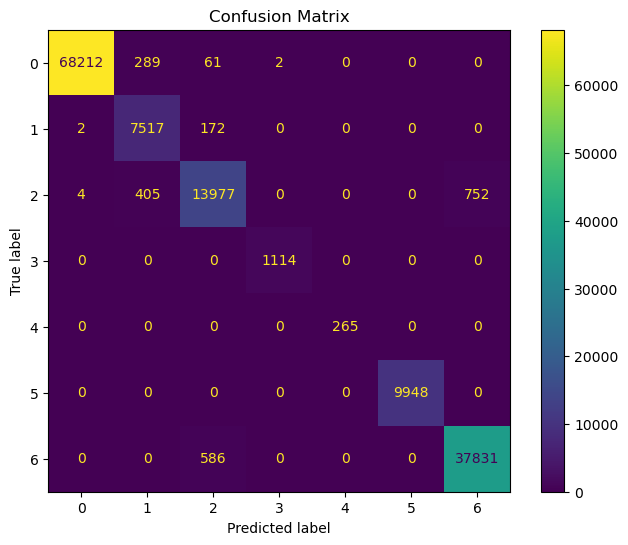

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
 
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix)

ax.set(title='Confusion Matrix')
display.plot(ax=ax);

# Explainability

In [35]:
import lime
from lime.lime_tabular import LimeTabularExplainer

## Feature Importance

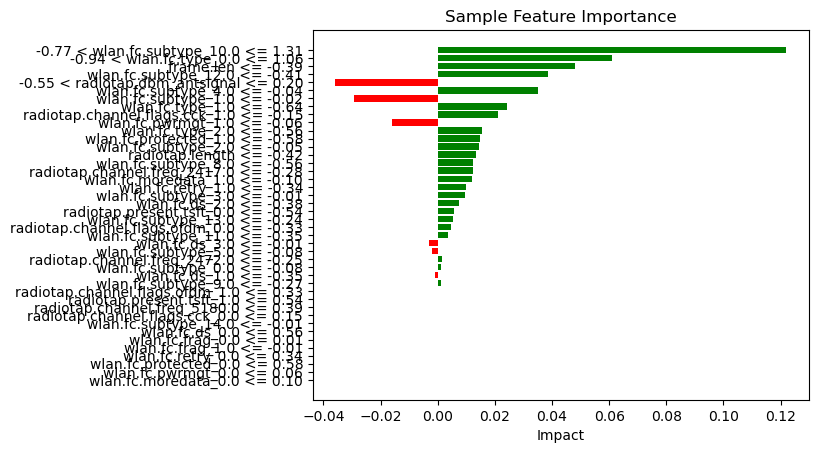

In [36]:
class_labels = rf_classifier.classes_

explainer = LimeTabularExplainer(X_train_scaled,
                                 feature_names=X.columns,
                                 class_names=class_labels,
                                 mode='classification')


sample = X_test_scaled[0]

explanation = explainer.explain_instance(sample,
                                         rf_classifier.predict_proba,
                                         num_features=len(X.columns),
                                         top_labels=len(class_labels))

fig = explanation.as_pyplot_figure(label=6)
plt.title('Sample Feature Importance')
plt.xlabel('Impact')
plt.show()


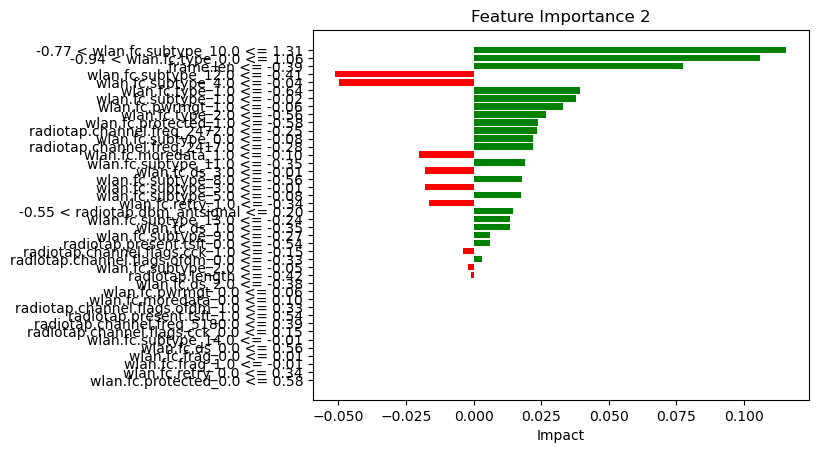

In [37]:
fig = explanation.as_pyplot_figure(label=2)
plt.title('Feature Importance 2')
plt.xlabel('Impact')
plt.show()

### SHAP

In [38]:
'''
import shap

SHAPexplainer = shap.TreeExplainer(rf_classifier)

shap_values = SHAPexplainer.shap_values(sample)

shap.summary_plot(shap_values, X.columns, color="blue")

'''

'\nimport shap\n\nSHAPexplainer = shap.TreeExplainer(rf_classifier)\n\nshap_values = SHAPexplainer.shap_values(sample)\n\nshap.summary_plot(shap_values, X.columns, color="blue")\n\n'

# NLP

In [39]:
# helper methods to generate the prompt
def label_name(number):
    match number:
        case 0:
            return "Normal"
        case 1:
            return "Deauth"
        case 2:
            return "Disas"
        case 3:
            return "Reassoc"
        case 4:
            return "RogueAP"
        case 5:
            return "Krack"
        case 6:
            return "Kr00k"
        case _:
            return "UNKNOWN"


def feature_importance_boolean(value):
    if(value < 0):
        return "Negative"
    return "Positive" 


In [40]:
'''
NLP MODEL
-Template based Natural Language Generation

~change sample according to which packet you'd like to analyze
~sample is in the form of a 2D matrix, that reperesents all the features of the packet except the label 

'''

trial_pred = rf_classifier.predict([sample])

print("The sample packet was predicted to be a {} packet\n ".format(label_name(trial_pred)))
print("The Feature Importances responsible for this desicion: \n")
list_explanation = explanation.as_list()

for feature, weight in list_explanation:
    if(abs(weight)> 0.001):
        print("the feature in range {} , gave a {} impact of weight {}".format(feature,feature_importance_boolean(weight),weight ))
    else:
        print("the feature {}, had an insignificant weight meaning it could be removed in this case".format(feature))

The sample packet was predicted to be a Kr00k packet
 
The Feature Importances responsible for this desicion: 

the feature in range wlan.fc.subtype_12.0 <= -0.41 , gave a Negative impact of weight -0.07608403214032192
the feature in range -0.94 < wlan.fc.type_0.0 <= 1.06 , gave a Positive impact of weight 0.043686687113668646
the feature in range -0.77 < wlan.fc.subtype_10.0 <= 1.31 , gave a Negative impact of weight -0.03493118526271472
the feature in range frame.len <= -0.39 , gave a Positive impact of weight 0.028496908212166085
the feature in range wlan.fc.subtype_4.0 <= -0.04 , gave a Positive impact of weight 0.027635972059861166
the feature in range wlan.fc.subtype_0.0 <= -0.08 , gave a Positive impact of weight 0.018733000618935076
the feature in range wlan.fc.subtype_3.0 <= -0.01 , gave a Negative impact of weight -0.016782855650199213
the feature in range wlan.fc.pwrmgt_1.0 <= -0.06 , gave a Positive impact of weight 0.015968986352830963
the feature in range -0.55 < radiotap

In [41]:
explanation.show_in_notebook(show_all=False)

# appendix

In [42]:
pd.DataFrame(explanation.as_list(),columns=['Feature','Contribution'])

,Feature,Contribution
0,wlan.fc.subtype_12.0 <= -0.41,-0.076084
1,-0.94 < wlan.fc.type_0.0 <= 1.06,0.043687
2,-0.77 < wlan.fc.subtype_10.0 <= 1.31,-0.034931
3,frame.len <= -0.39,0.028497
4,wlan.fc.subtype_4.0 <= -0.04,0.027636
5,wlan.fc.subtype_0.0 <= -0.08,0.018733
6,wlan.fc.subtype_3.0 <= -0.01,-0.016783
7,wlan.fc.pwrmgt_1.0 <= -0.06,0.015969
8,-0.55 < radiotap.dbm_antsignal <= 0.20,0.013955
9,radiotap.channel.freq_2417.0 <= -0.28,0.013593


In [43]:
'''
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select numerical and categorical features
numerical_features = ['frame.len', 'radiotap.length', 'radiotap.dbm_antsignal']
categorical_features = ['radiotap.present.tsft', 'radiotap.channel.freq', 
                        'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', 
                        'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 
                        'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 
                        'wlan.fc.moredata', 'wlan.fc.protected']

# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
processed = preprocessor.fit_transform(sampled_df)
one_hot_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Concatenate the lists of feature names
all_feature_names = numerical_features + list(one_hot_feature_names)

# Convert transformed array into DataFrame
processed_df = pd.DataFrame(processed, columns=all_feature_names)

processed_df['Label'] = sampled_df['Label']
'''

"\nfrom sklearn.preprocessing import MinMaxScaler, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline\n\n# Select numerical and categorical features\nnumerical_features = ['frame.len', 'radiotap.length', 'radiotap.dbm_antsignal']\ncategorical_features = ['radiotap.present.tsft', 'radiotap.channel.freq', \n                        'radiotap.channel.flags.cck', 'radiotap.channel.flags.ofdm', \n                        'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', \n                        'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', \n                        'wlan.fc.moredata', 'wlan.fc.protected']\n\n# Define preprocessing steps for numerical and categorical features\nnumerical_transformer = Pipeline(steps=[\n    ('scaler', MinMaxScaler())\n])\n\ncategorical_transformer = Pipeline(steps=[\n    ('onehot', OneHotEncoder())\n])\n\n# Combine preprocessing steps for numerical and categorical features\npreprocessor = ColumnTransformer(\n

In [44]:
y_pred

array([6, 2, 6, ..., 2, 0, 2], dtype=int64)

In [45]:
y_test

array([6, 6, 6, ..., 2, 0, 2], dtype=int64)

In [46]:
X_test.iloc[0]

frame.len                          0.005003
radiotap.length                    0.500000
radiotap.dbm_antsignal             0.500000
radiotap.present.tsft_0.0          0.000000
radiotap.present.tsft_1.0          1.000000
radiotap.channel.freq_2417.0       0.000000
radiotap.channel.freq_2472.0       0.000000
radiotap.channel.freq_5180.0       1.000000
radiotap.channel.flags.cck_0.0     1.000000
radiotap.channel.flags.cck_1.0     0.000000
radiotap.channel.flags.ofdm_0.0    0.000000
radiotap.channel.flags.ofdm_1.0    1.000000
wlan.fc.type_0.0                   1.000000
wlan.fc.type_1.0                   0.000000
wlan.fc.type_2.0                   0.000000
wlan.fc.subtype_0.0                0.000000
wlan.fc.subtype_1.0                0.000000
wlan.fc.subtype_2.0                0.000000
wlan.fc.subtype_3.0                0.000000
wlan.fc.subtype_4.0                0.000000
wlan.fc.subtype_5.0                0.000000
wlan.fc.subtype_8.0                0.000000
wlan.fc.subtype_9.0             

In [47]:
trial_pred = rf_classifier.predict([X_test.iloc[0]])
trial_pred

array([2], dtype=int64)

In [48]:
X_test_scaled[0:1]

array([[-0.38548066, -0.42307648, -0.45922164, -0.54441011,  0.54441011,
        -0.27630165, -0.24957744,  0.38581073,  0.14856295, -0.14856295,
        -0.33293103,  0.33293103,  1.05911437, -0.6412509 , -0.55779227,
        -0.07578644, -0.0205798 , -0.05369511, -0.01363909, -0.04208233,
        -0.07615203, -0.55892771, -0.26610522,  1.3067279 , -0.35372985,
        -0.41148085, -0.238258  , -0.00624267,  0.55771312, -0.349631  ,
        -0.38361105, -0.00652026,  0.00665472, -0.00665472,  0.33548235,
        -0.33548235,  0.05557056, -0.05557056,  0.10038269, -0.10038269,
         0.57530081, -0.57530081]])

In [49]:
NLP_explanation = explainer.explain_instance(sample, rf_classifier.predict_proba, num_features=len(X.columns))
local_normal_explanation = explanation.as_list()

for feature, weight in local_normal_explanation:
    print(f"{feature}: {weight}")

wlan.fc.subtype_12.0 <= -0.41: -0.07608403214032192
-0.94 < wlan.fc.type_0.0 <= 1.06: 0.043686687113668646
-0.77 < wlan.fc.subtype_10.0 <= 1.31: -0.03493118526271472
frame.len <= -0.39: 0.028496908212166085
wlan.fc.subtype_4.0 <= -0.04: 0.027635972059861166
wlan.fc.subtype_0.0 <= -0.08: 0.018733000618935076
wlan.fc.subtype_3.0 <= -0.01: -0.016782855650199213
wlan.fc.pwrmgt_1.0 <= -0.06: 0.015968986352830963
-0.55 < radiotap.dbm_antsignal <= 0.20: 0.013955226847163238
radiotap.channel.freq_2417.0 <= -0.28: 0.013593220127481957
wlan.fc.type_1.0 <= -0.64: 0.012749265082262174
wlan.fc.subtype_13.0 <= -0.24: 0.010643663559658477
radiotap.channel.flags.ofdm_0.0 <= -0.33: 0.009129962341947762
wlan.fc.type_2.0 <= -0.56: 0.008754852620314788
wlan.fc.retry_1.0 <= -0.34: 0.008444722543547332
wlan.fc.subtype_8.0 <= -0.56: 0.008308247856703836
wlan.fc.subtype_5.0 <= -0.08: 0.007059243318091199
radiotap.channel.flags.cck_1.0 <= -0.15: 0.005935007114116469
wlan.fc.protected_1.0 <= -0.58: 0.0057612304